EXAMPLE 16-3 - HYPERBOLIC DECLINE ANALYSIS

STEP 1: Determine type of decline


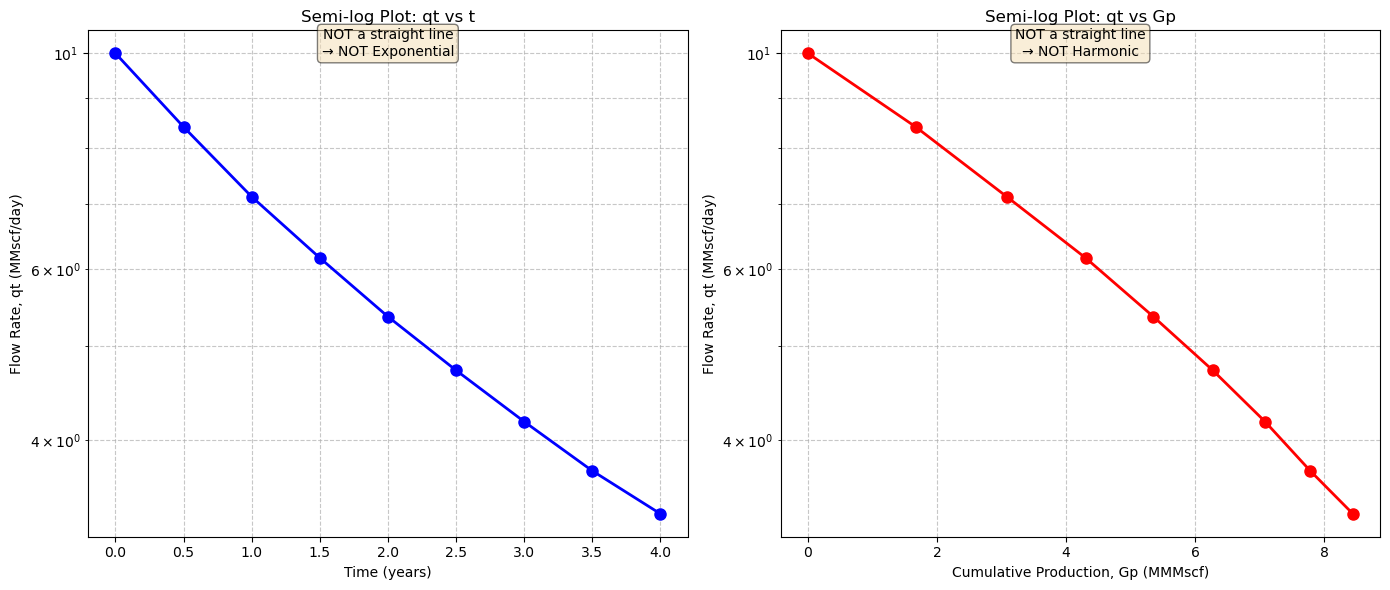

✓ Both plots are NOT straight lines
✓ Therefore, decline is HYPERBOLIC (0 < b < 1)

STEP 2: Determine initial parameters
qi (from graph extrapolation) = 10.0 MMscf/day
Endpoint (t2, q2) = (4.0 years, 3.36 MMscf/day)

q1 = √(qi × q2) = √(10.0 × 3.36) = 5.7966 MMscf/day
t1 (from interpolation at q1=5.7966) = 1.7142 years

STEP 5: Solve for b using Newton-Raphson iteration
Iteration  b^k             f(b^k)               f'(b^k)              b^{k+1}        
--------------------------------------------------------------------------------
0          0.500000        1.072560e-02         -0.360359            0.529764       
1          0.529764        -8.793513e-04        -0.419897            0.527669       
2          0.527669        -4.481583e-06        -0.415619            0.527659       
3          0.527659        -1.185620e-10        -0.415597            0.527659       

✓ Converged after 4 iterations
✓ b = 0.527659

STEP 6: Calculate decline rate Di
Di = [(qi/q2)^b - 1] / (b × t2)
   = [(

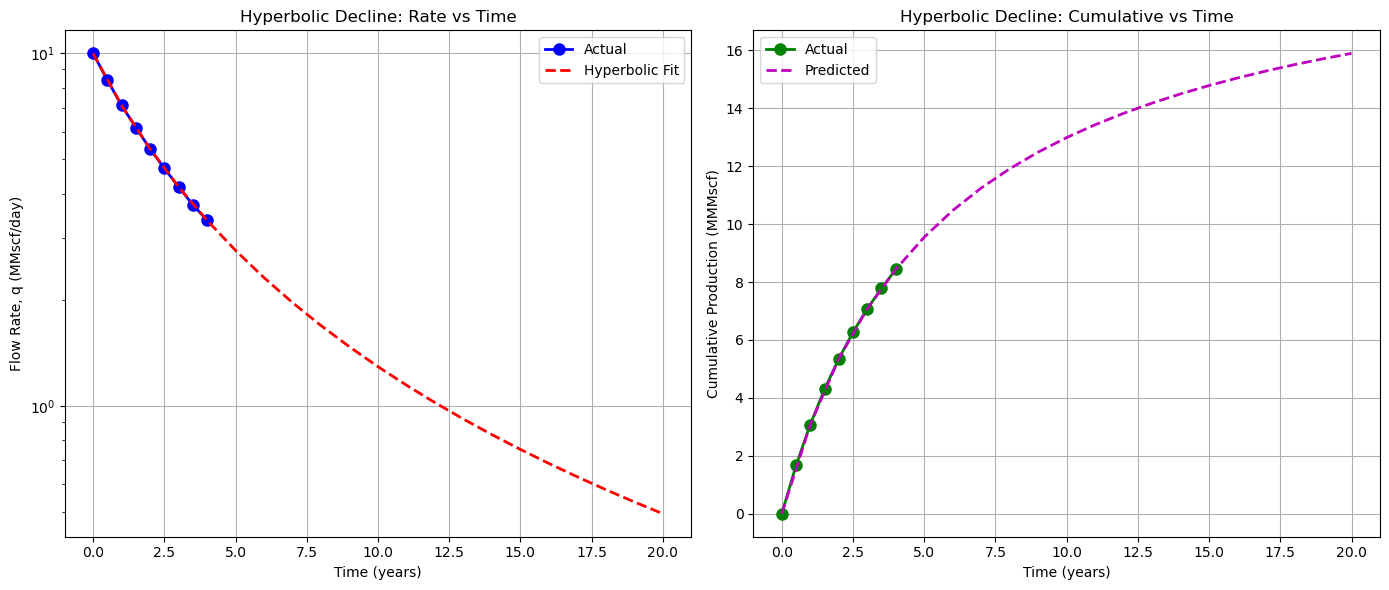


SUMMARY OF HYPERBOLIC DECLINE PARAMETERS
                Parameter                          Value
        Initial rate (qi)                 10.0 MMscf/day
     Decline exponent (b)                       0.527659
Initial decline rate (Di)                0.368608 year⁻¹
             Di (monthly)               0.030717 month⁻¹
               Di (daily)                 0.001010 day⁻¹
        Endpoint (t2, q2)    (4.0 years, 3.36 MMscf/day)
        Midpoint (t1, q1) (1.714 years, 5.797 MMscf/day)

PREDICTIONS AT KEY FUTURE TIMES
Year     q_pred          Gp_pred        
         (MMscf/day)     (MMMscf)       
----------------------------------------
5        2.760           9.551          
10       1.291           12.992         
15       0.752           14.789         
20       0.494           15.901         


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from Example 16-3 (Ikoku, 1984)
data = {
    'Date': ['Jan 1, 1979', 'Jul 1, 1979', 'Jan 1, 1980', 'Jul 1, 1980',
             'Jan 1, 1981', 'Jul 1, 1981', 'Jan 1, 1982', 'Jul 1, 1982',
             'Jan 1, 1983'],
    'Time_years': [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0],
    'qt_actual': [10.00, 8.40, 7.12, 6.16, 5.36, 4.72, 4.18, 3.72, 3.36],
    'Gp_actual': [0.00, 1.67, 3.08, 4.30, 5.35, 6.27, 7.08, 7.78, 8.44]
}

df = pd.DataFrame(data)

print("=" * 70)
print("EXAMPLE 16-3 - HYPERBOLIC DECLINE ANALYSIS")
print("=" * 70)

# Step 1: Determine type of decline
print("\n" + "=" * 70)
print("STEP 1: Determine type of decline")
print("=" * 70)

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: qt vs t on semi-log scale
ax1.semilogy(df['Time_years'], df['qt_actual'], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Flow Rate, qt (MMscf/day)')
ax1.set_title('Semi-log Plot: qt vs t')
ax1.grid(True, which='both', linestyle='--', alpha=0.7)
ax1.text(0.5, 0.95, 'NOT a straight line\n→ NOT Exponential', 
         transform=ax1.transAxes, ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Plot 2: qt vs Gp on semi-log scale
ax2.semilogy(df['Gp_actual'], df['qt_actual'], 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Cumulative Production, Gp (MMMscf)')
ax2.set_ylabel('Flow Rate, qt (MMscf/day)')
ax2.set_title('Semi-log Plot: qt vs Gp')
ax2.grid(True, which='both', linestyle='--', alpha=0.7)
ax2.text(0.5, 0.95, 'NOT a straight line\n→ NOT Harmonic', 
         transform=ax2.transAxes, ha='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("✓ Both plots are NOT straight lines")
print("✓ Therefore, decline is HYPERBOLIC (0 < b < 1)")

# Step 2: Determine initial flow rate qi
print("\n" + "=" * 70)
print("STEP 2: Determine initial parameters")
print("=" * 70)

# From the smooth curve extension in Fig 16-5
qi = 10.0  # MMscf/day (from extrapolation to t=0)
print(f"qi (from graph extrapolation) = {qi} MMscf/day")

# Step 3: Select other endpoint
t2 = 4.0  # years
q2 = 3.36  # MMscf/day
print(f"Endpoint (t2, q2) = ({t2} years, {q2} MMscf/day)")

# Step 4: Calculate q1 using geometric mean
q1 = np.sqrt(qi * q2)
print(f"\nq1 = √(qi × q2) = √({qi} × {q2}) = {q1:.4f} MMscf/day")

# Find t1 corresponding to q1 from the data
# Interpolate from the data to find t1 for q1
from scipy.interpolate import interp1d

# Create interpolation function
f_interp = interp1d(df['qt_actual'], df['Time_years'], kind='cubic')
t1 = float(f_interp(q1))
print(f"t1 (from interpolation at q1={q1:.4f}) = {t1:.4f} years")

# Step 5: Solve for b iteratively using Newton-Raphson
print("\n" + "=" * 70)
print("STEP 5: Solve for b using Newton-Raphson iteration")
print("=" * 70)

def f_b(b, qi=qi, q1=q1, q2=q2, t1=t1, t2=t2):
    """Function f(b) from Equation 16-18"""
    return t2 * (qi/q1)**b - t1 * (qi/q2)**b - (t2 - t1)

def f_prime_b(b, qi=qi, q1=q1, q2=q2, t1=t1, t2=t2):
    """Derivative f'(b) from Equation 16-20"""
    term1 = t2 * (qi/q1)**b * np.log(qi/q1)
    term2 = t1 * (qi/q2)**b * np.log(qi/q2)
    return term1 - term2

# Newton-Raphson iteration
b_current = 0.5  # Initial guess
tolerance = 1e-6
max_iterations = 20
iteration_data = []

print(f"{'Iteration':<10} {'b^k':<15} {'f(b^k)':<20} {'f\'(b^k)':<20} {'b^{k+1}':<15}")
print("-" * 80)

for i in range(max_iterations):
    f_val = f_b(b_current)
    f_prime_val = f_prime_b(b_current)
    b_next = b_current - f_val / f_prime_val
    
    iteration_data.append([i, b_current, f_val, f_prime_val, b_next])
    
    print(f"{i:<10} {b_current:<15.6f} {f_val:<20.6e} {f_prime_val:<20.6f} {b_next:<15.6f}")
    
    if abs(b_next - b_current) < tolerance:
        b_current = b_next
        break
    
    b_current = b_next

b = b_current
print(f"\n✓ Converged after {i+1} iterations")
print(f"✓ b = {b:.6f}")

# Step 6: Calculate Di using Equation 16-21
print("\n" + "=" * 70)
print("STEP 6: Calculate decline rate Di")
print("=" * 70)

Di = ((qi/q2)**b - 1) / (b * t2)
print(f"Di = [(qi/q2)^b - 1] / (b × t2)")
print(f"   = [({qi}/{q2})^{b:.4f} - 1] / ({b:.4f} × {t2})")
print(f"   = [{(qi/q2):.4f}^{b:.4f} - 1] / {b*t2:.4f}")
print(f"   = [{(qi/q2)**b:.4f} - 1] / {b*t2:.4f}")
print(f"   = {(qi/q2)**b - 1:.4f} / {b*t2:.4f}")
print(f"   = {Di:.6f} year⁻¹")

# Convert to monthly and daily
Di_monthly = Di / 12
Di_daily = Di / 365
print(f"\nDi (monthly) = {Di_monthly:.6f} month⁻¹")
print(f"Di (daily)   = {Di_daily:.6f} day⁻¹")

# Step 7: Predict future performance for next 16 years
print("\n" + "=" * 70)
print("STEP 7: Predict future performance (next 16 years)")
print("=" * 70)

# Hyperbolic decline equations
def hyperbolic_qt(t, qi=qi, Di=Di, b=b):
    """Flow rate at time t using hyperbolic equation"""
    return qi / (1 + b * Di * t)**(1/b)

def hyperbolic_Gp(qt, qi=qi, Di=Di, b=b):
    """Cumulative production up to flow rate qt"""
    # Note: Di must be in day^-1 for Gp in MMscf (not MMMscf)
    Di_daily_for_Gp = Di / 365  # Convert yearly Di to daily
    return (qi / (Di_daily_for_Gp * (1 - b))) * (1 - (qt/qi)**(1-b))

# Create prediction for years 0 to 20
prediction_years = np.arange(0, 21, 1)  # 0 to 20 years
predictions = []

for year in prediction_years:
    if year <= 4:
        # Use actual data for first 4 years
        mask = np.isclose(df['Time_years'], year)
        if mask.any():
            idx = np.where(mask)[0][0]
            qt = df.loc[idx, 'qt_actual']
            Gp = df.loc[idx, 'Gp_actual']
        else:
            qt = hyperbolic_qt(year)
            # For Gp at intermediate years, interpolate or calculate
            Gp = hyperbolic_Gp(qt) / 1000  # Convert to MMMscf
    else:
        # Predict for future years
        qt = hyperbolic_qt(year)
        Gp = hyperbolic_Gp(qt) / 1000  # Convert to MMMscf
    
    predictions.append({
        'Time_years': year,
        'qt_pred': qt,
        'Gp_pred': Gp
    })

pred_df = pd.DataFrame(predictions)

# Format the prediction table as in the PDF
print("\nFuture Production Performance:")
print("-" * 80)
print(f"{'Time (years)':<15} {'q_pred':<20} {'Gp_pred':<20}")
print(f"{'':<15} {'(MMscf/day)':<20} {'(MMMscf)':<20}")
print("-" * 80)

for i, row in pred_df.iterrows():
    if i % 5 == 0 or i < 10:  # Print all first 10, then every 5th
        print(f"{row['Time_years']:<15.1f} {row['qt_pred']:<20.6f} {row['Gp_pred']:<20.6f}")

# Create detailed comparison table for first 4 years
print("\n\nComparison with Actual Data (First 4 years):")
print("-" * 80)
print(f"{'Time':<8} {'q_actual':<12} {'q_pred':<12} {'Gp_actual':<12} {'Gp_pred':<12}")
print(f"{'(years)':<8} {'(MMscf/d)':<12} {'(MMscf/d)':<12} {'(MMMscf)':<12} {'(MMMscf)':<12}")
print("-" * 80)

for idx, row in df.iterrows():
    qt_pred = hyperbolic_qt(row['Time_years'])
    Gp_pred = hyperbolic_Gp(qt_pred) / 1000  # Convert to MMMscf
    print(f"{row['Time_years']:<8.1f} {row['qt_actual']:<12.2f} {qt_pred:<12.6f} "
          f"{row['Gp_actual']:<12.2f} {Gp_pred:<12.6f}")

# Visualization
fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Rate vs Time
ax3.plot(df['Time_years'], df['qt_actual'], 'bo-', linewidth=2, markersize=8, label='Actual')
ax3.plot(pred_df['Time_years'], pred_df['qt_pred'], 'r--', linewidth=2, label='Hyperbolic Fit')
ax3.set_xlabel('Time (years)')
ax3.set_ylabel('Flow Rate, q (MMscf/day)')
ax3.set_title('Hyperbolic Decline: Rate vs Time')
ax3.grid(True)
ax3.legend()
ax3.set_yscale('log')

# Plot 2: Cumulative vs Time
ax4.plot(df['Time_years'], df['Gp_actual'], 'go-', linewidth=2, markersize=8, label='Actual')
ax4.plot(pred_df['Time_years'], pred_df['Gp_pred'], 'm--', linewidth=2, label='Predicted')
ax4.set_xlabel('Time (years)')
ax4.set_ylabel('Cumulative Production (MMMscf)')
ax4.set_title('Hyperbolic Decline: Cumulative vs Time')
ax4.grid(True)
ax4.legend()

plt.tight_layout()
plt.show()

# Summary of parameters
print("\n" + "=" * 70)
print("SUMMARY OF HYPERBOLIC DECLINE PARAMETERS")
print("=" * 70)
summary_data = {
    'Parameter': ['Initial rate (qi)', 'Decline exponent (b)', 
                  'Initial decline rate (Di)', 'Di (monthly)', 'Di (daily)',
                  'Endpoint (t2, q2)', 'Midpoint (t1, q1)'],
    'Value': [f'{qi} MMscf/day', f'{b:.6f}', f'{Di:.6f} year⁻¹',
              f'{Di_monthly:.6f} month⁻¹', f'{Di_daily:.6f} day⁻¹',
              f'({t2} years, {q2} MMscf/day)', f'({t1:.3f} years, {q1:.3f} MMscf/day)']
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# Calculate predictions at specific future times
print("\n" + "=" * 70)
print("PREDICTIONS AT KEY FUTURE TIMES")
print("=" * 70)

future_times = [5, 10, 15, 20]
print(f"{'Year':<8} {'q_pred':<15} {'Gp_pred':<15}")
print(f"{'':<8} {'(MMscf/day)':<15} {'(MMMscf)':<15}")
print("-" * 40)

for year in future_times:
    qt = hyperbolic_qt(year)
    Gp = hyperbolic_Gp(qt) / 1000
    print(f"{year:<8} {qt:<15.3f} {Gp:<15.3f}")